In [2]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [8]:
dir_path = "custom_data"

In [9]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
walk_through_dir(dir_path)

There are 3 directories and 0 images in 'custom_data'.
There are 0 directories and 144 images in 'custom_data\Cats'.
There are 0 directories and 90 images in 'custom_data\Dogs'.
There are 0 directories and 90 images in 'custom_data\Horses'.


In [58]:
import torchvision
from torchvision import datasets, transforms
data_transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(128, 128))])

In [59]:
data = datasets.ImageFolder(dir_path, transform = data_transforms, target_transform = None)
data

Dataset ImageFolder
    Number of datapoints: 324
    Root location: custom_data
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
           )

In [60]:
class_names = data.classes
class_names

['Cats', 'Dogs', 'Horses']

In [61]:
print(f'Image: {data[0][0]}')
print(f'Lable: {data[0][1]}')

Image: tensor([[[2.8722e-01, 2.9634e-01, 2.8916e-01,  ..., 8.2024e-01,
          8.2333e-01, 8.2756e-01],
         [2.9487e-01, 3.0560e-01, 3.0023e-01,  ..., 8.1638e-01,
          8.1864e-01, 8.2354e-01],
         [2.9890e-01, 3.1167e-01, 3.0656e-01,  ..., 8.0607e-01,
          8.0875e-01, 8.1612e-01],
         ...,
         [2.7808e-02, 2.5879e-02, 2.5050e-02,  ..., 9.5980e-02,
          1.3525e-01, 1.2704e-01],
         [1.0385e-01, 9.7186e-02, 9.8360e-02,  ..., 6.0696e-02,
          6.4794e-02, 7.6657e-02],
         [1.5592e-01, 1.6268e-01, 1.6690e-01,  ..., 4.6447e-02,
          4.4129e-02, 4.4694e-02]],

        [[1.3041e-01, 1.2436e-01, 1.1511e-01,  ..., 2.8846e-01,
          2.9789e-01, 3.0359e-01],
         [1.2209e-01, 1.2371e-01, 1.1994e-01,  ..., 2.8438e-01,
          2.8779e-01, 2.9118e-01],
         [1.1734e-01, 1.2619e-01, 1.2324e-01,  ..., 2.8407e-01,
          2.8607e-01, 2.8569e-01],
         ...,
         [2.3437e-03, 2.2144e-03, 2.4645e-03,  ..., 7.2253e-02,
        

In [62]:
data??

Type:        ImageFolder
String form:
Dataset ImageFolder
    Number of datapoints: 324
    Root location: custom_data
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
           )
Length:      324
File:        c:\arun\machine learning\virtualenvprojects\pytorch\torch\lib\site-packages\torchvision\datasets\folder.py
Source:     
class ImageFolder(DatasetFolder):
    """A generic data loader where the images are arranged in this way by default: ::

        root/dog/xxx.png
        root/dog/xxy.png
        root/dog/[...]/xxz.png

        root/cat/123.png
        root/cat/nsdf3.png
        root/cat/[...]/asd932_.png

    This class inherits from :class:`~torchvision.datasets.DatasetFolder` so
    the same methods can be overridden to customize the dataset.

    Args:
        root (str or ``pathlib.Path``): Root directory path.
        transform (callable, optional): A function/

In [63]:
data.class_to_idx

{'Cats': 0, 'Dogs': 1, 'Horses': 2}

In [64]:
data[0][0].shape

torch.Size([3, 128, 128])

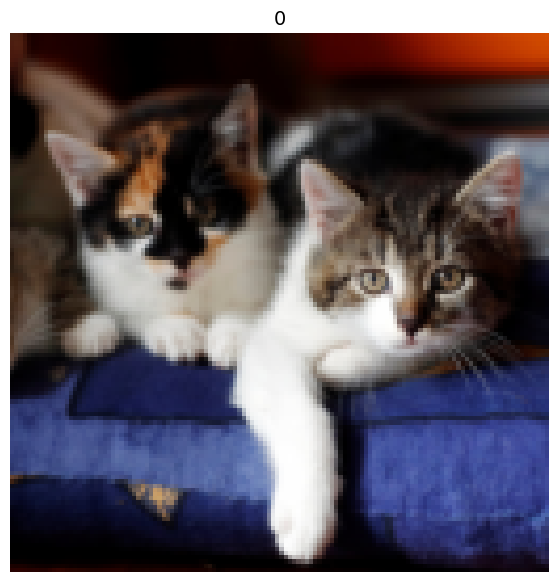

In [65]:
# Rearrange the order of dimensions
img_permute = data[0][0].permute(1, 2, 0)
import matplotlib.pyplot as plt
#Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(data[0][1], fontsize=14);

In [66]:
from torch.utils.data import random_split
generator1 = torch.Generator().manual_seed(42)
train_data, test_data = random_split(data, [0.8, 0.2], generator=generator1)

In [67]:
train_data??

Type:        Subset
String form: <torch.utils.data.dataset.Subset object at 0x0000016363DDEC10>
Length:      260
File:        c:\arun\machine learning\virtualenvprojects\pytorch\torch\lib\site-packages\torch\utils\data\dataset.py
Source:     
class Subset(Dataset[T_co]):
    r"""
    Subset of a dataset at specified indices.

    Args:
        dataset (Dataset): The whole Dataset
        indices (sequence): Indices in the whole set selected for subset
    """

    dataset: Dataset[T_co]
    indices: Sequence[int]

    def __init__(self, dataset: Dataset[T_co], indices: Sequence[int]) -> None:
        self.dataset = dataset
        self.indices = indices

    def __getitem__(self, idx):
        if isinstance(idx, list):
            return self.dataset[[self.indices[i] for i in idx]]
        return self.dataset[self.indices[idx]]

    def __getitems__(self, indices: List[int]) -> List[T_co]:
        # add batched sampling support when parent dataset supports it.
        # see torch.utils

In [48]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=8,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=8, 
                             num_workers=1, 
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1635bbbc390>,
 <torch.utils.data.dataloader.DataLoader at 0x1635b518810>)

In [68]:
train_dataloader??

Type:        DataLoader
String form: <torch.utils.data.dataloader.DataLoader object at 0x000001635BBBC390>
Length:      33
File:        c:\arun\machine learning\virtualenvprojects\pytorch\torch\lib\site-packages\torch\utils\data\dataloader.py
Source:     
class DataLoader(Generic[T_co]):
    r"""
    Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

    The :class:`~torch.utils.data.DataLoader` supports both map-style and
    iterable-style datasets with single- or multi-process loading, customizing
    loading order and optional automatic batching (collation) and memory pinning.

    See :py:mod:`torch.utils.data` documentation page for more details.

    Args:
        dataset (Dataset): dataset from which to load the data.
        batch_size (int, optional): how many samples per batch to load
            (default: ``1``).
        shuffle (bool, optional): set to ``True`` to have the data reshuffled
            at every epoch (default: ``F

In [57]:
# img, label = next(iter(train_dataloader))

# # Batch size will now be 1, try changing the batch_size parameter above and see what happens
# print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
# print(f"Label shape: {label.shape}")


for batch in train_dataloader:
    for x, y in batch:
        print(x)

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 54, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\collate.py", line 316, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\collate.py", line 173, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\collate.py", line 173, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\collate.py", line 141, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Arun\Machine Learning\VirtualEnvProjects\PyTorch\torch\Lib\site-packages\torch\utils\data\_utils\collate.py", line 213, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: stack expects each tensor to be equal size, but got [3, 225, 225] at entry 0 and [3, 100, 100] at entry 1
